In [ ]:
# Installing Libraries for GCI
!pip install yfinance
!pip install tfcausalimpact

In [2]:
# Installing libraries
import pandas as pd
import seaborn as sns
from causalimpact import CausalImpact
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Loading data
%cd /content/drive/MyDrive/Econometrics and Causal Inference/Google Causal Impact

/content/drive/MyDrive/Econometrics and Causal Inference/Google Causal Impact


In [4]:
# Defining Dates
training_start = "2014-01-02"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-01"

## Loading Financial Data

In [5]:
y = ["VOW.DE"]
y = yf.download(tickers= y,
                start= training_start,
                end= end_stock,
                interval= '1wk')
y = y['Adj Close'].rename("y")
y

[*********************100%%**********************]  1 of 1 completed


Date
2014-01-01    124.750320
2014-01-08    122.623337
2014-01-15    126.812836
2014-01-22    120.786400
2014-01-29    113.116409
                 ...    
2015-09-02    111.309700
2015-09-09    112.285507
2015-09-16     74.834564
2015-09-23     69.518089
2015-09-30     70.695786
Name: y, Length: 92, dtype: float64

In [6]:
# Loading more stock data
stocks = ["META", "DIS", "NVS", "CARL-B.CO"]
X = yf.download(tickers= stocks,
                start= training_start,
                end= end_stock,
                interval= '1wk')
X.head()

[*********************100%%**********************]  4 of 4 completed


Adj Close                                      Close             \
             CARL-B.CO        DIS       META        NVS CARL-B.CO        DIS   
Date                                                                           
2014-01-01  482.852173  70.256927  57.919998  49.613323     598.5  76.339996   
2014-01-08  464.699860  68.517548  57.740002  50.406189     576.0  74.449997   
2014-01-15  482.448883  68.287468  58.509998  50.799496     598.0  74.199997   
2014-01-22  448.564423  67.072639  55.139999  49.669506     556.0  72.879997   
2014-01-29  437.269653  65.388466  62.750000  48.820457     542.0  71.050003   

                                      High             ...        Low  \
                 META        NVS CARL-B.CO        DIS  ...       META   
Date                                                   ...              
2014-01-01  57.919998  71.209679     602.5  76.839996  ...  54.049999   
2014-01-08  57.740002  72.347672     599.5  76.279999  ...  55.380001   
2014-01-15  58.509998  72.912186     605.5  75.099998  ...  56.070000   
2014-01-22  55.139999  71.290321     608.5  75.430000  ...  51.849998   
2014-01-29  62.750000  70.071686     562.5  73.629997  ...  53.189999   

                           Open                                     Volume  \
                  NVS CARL-B.CO        DIS       META        NVS CARL-B.CO   
Date                                                                         
2014-01-01  70.376343     600.0  76.040001  54.830002  70.824371    866238   
2014-01-08  71.030464     599.5  76.129997  57.599998  71.505379   1660754   
2014-01-15  72.141579     579.0  74.300003  57.980000  72.365593   2023405   
2014-01-22  70.465950     597.5  74.080002  58.849998  72.437279   2317390   
2014-01-29  69.802864     562.0  71.970001  54.610001  70.905022   2964456   

                                           
                 DIS       META       NVS  
Date                                       
2014-01-01  20572700  227501700   6748786  
2014-01-08  39401500  291899700   8378817  
2014-01-15  27013200  157723600   5729879  
2014-01-22  33334400  286620700  12056260  
2014-01-29  47147400  451821200  15804680  

[5 rows x 24 columns]

In [7]:
# Getting just the adjusted close
X = X.iloc[:,:len(stocks)]
X.head(2)

Adj Close                                 
             CARL-B.CO        DIS       META        NVS
Date                                                   
2014-01-01  482.852173  70.256927  57.919998  49.613323
2014-01-08  464.699860  68.517548  57.740002  50.406189

In [8]:
# Removing unwanted columns
X.columns = X.columns.droplevel()
X.head()

,CARL-B.CO,DIS,META,NVS
Date,,,,
2014-01-01,482.852173,70.256927,57.919998,49.613323
2014-01-08,464.699860,68.517548,57.740002,50.406189
2014-01-15,482.448883,68.287468,58.509998,50.799496
2014-01-22,448.564423,67.072639,55.139999,49.669506
2014-01-29,437.269653,65.388466,62.750000,48.820457


In [9]:
df = pd.concat([y, X], axis=1).dropna()
df

,y,CARL-B.CO,DIS,META,NVS
Date,,,,,
2014-01-01,124.750320,482.852173,70.256927,57.919998,49.613323
2014-01-08,122.623337,464.699860,68.517548,57.740002,50.406189
2014-01-15,126.812836,482.448883,68.287468,58.509998,50.799496
2014-01-22,120.786400,448.564423,67.072639,55.139999,49.669506
2014-01-29,113.116409,437.269653,65.388466,62.750000,48.820457
...,...,...,...,...,...
2015-09-02,111.309700,419.131836,97.502518,89.529999,63.864338
2015-09-09,112.285507,409.725281,96.958801,92.900002,63.957256
2015-09-16,74.834564,418.299377,96.077606,92.959999,61.601490


In [10]:
df.to_csv("output.csv", index= True)

## Data Analysis

In [11]:
# Preparing datafram with datframe training period

df_training = df[df.index <= training_end ]
df_training.tail()

,y,CARL-B.CO,DIS,META,NVS
Date,,,,,
2015-07-29,125.172935,495.716003,114.076347,94.059998,68.728493
2015-08-05,125.307503,494.051056,101.242867,93.620003,67.753006
2015-08-12,117.904800,491.137482,100.249191,95.169998,68.496223
2015-08-19,112.924812,413.554504,89.890549,83.000000,63.134396
2015-08-26,108.987923,411.723145,93.284073,87.230003,62.829136


In [12]:
df_training.to_csv("df_training.csv", index=True)

<Axes: >

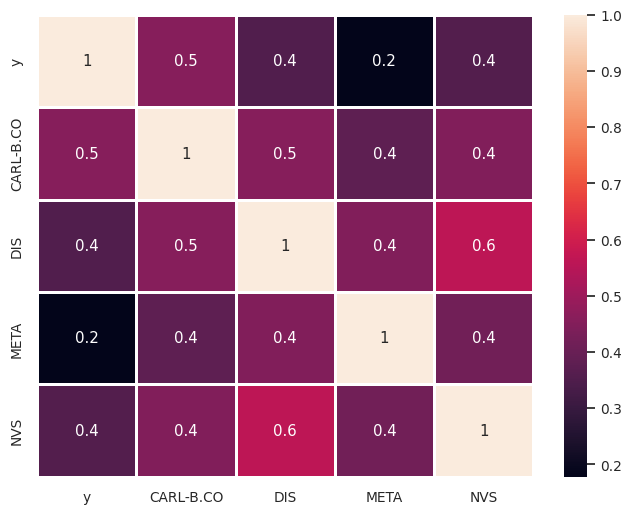

In [13]:
# Correlation Matrix
plt.figure(figsize=(8,6))
sns.set(font_scale= 0.9)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot= True,
            fmt= '.1g',
            linewidths = 1,
            linecolor= 'white'
            )

In [14]:
# Preparation of Data
df = df.drop(columns= ["META"])
df.head(1)

,y,CARL-B.CO,DIS,NVS
Date,,,,
2014-01-01,124.75032,482.852173,70.256927,49.613323


## Google Causal Impact

In [15]:
#Prepare pre and post period
pre_period = ["2014-01-01", training_end]
post_period = [treatment_start, treatment_end]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


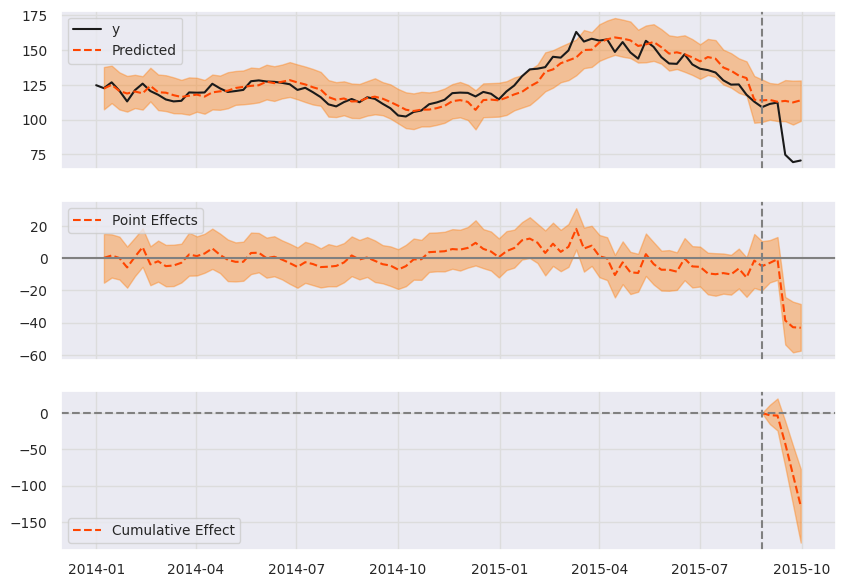

In [16]:
# Causal Analysis
impact = CausalImpact(data = df,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [17]:
plt.savefig("plot.png")

<Figure size 640x480 with 0 Axes>

In [18]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    87.73              438.64
Prediction (s.d.)         113.36 (5.08)      566.81 (25.39)
95% CI                    [102.98, 122.89]   [514.92, 614.45]

Absolute effect (s.d.)    -25.63 (5.08)      -128.17 (25.39)
95% CI                    [-35.16, -15.25]   [-175.81, -76.27]

Relative effect (s.d.)    -22.61% (4.48%)    -22.61% (4.48%)
95% CI                    [-31.02%, -13.46%] [-31.02%, -13.46%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [19]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 87.73. By contrast, in the absence of an
intervention, we would have expected an average response of 113.36.
The 95% interval of this counterfactual prediction is [102.98, 122.89].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -25.63 with a 95% interval of
[-35.16, -15.25]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 438.64.
By contrast, had the intervention not taken place, we would have expected
a sum of 566.81. The 95% interval of this prediction is [514.92, 614.45].


The above results are given in terms of absolute numbers. In relative
terms, the response 